In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df_model_complete = pd.read_csv("data/df_model_complete.csv")

df_model_complete.info()

df_model_complete.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   nome                                2273 non-null   object 
 1   ano                                 2273 non-null   int64  
 2   ponto_virada                        2247 non-null   float64
 3   inde                                2273 non-null   float64
 4   iaa                                 2273 non-null   float64
 5   ieg                                 2273 non-null   float64
 6   ips                                 2273 non-null   float64
 7   ida                                 2273 non-null   float64
 8   ipp                                 2273 non-null   float64
 9   ipv                                 2273 non-null   float64
 10  ian                                 2273 non-null   float64
 11  anos_pm                             2273 no

,nome,ano,ponto_virada,inde,iaa,ieg,ips,ida,ipp,ipv,...,bolsista,nao_bolsista,in_fase,ipv_pre_processado_resultado,ieg_pre_processado_resultado,ida_pre_processado_resultado,rec_ava_1_pre_processado_resultado,rec_ava_2_pre_processado_resultado,rec_ava_3_pre_processado_resultado,rec_ava_4_pre_processado_resultado
0,aluno1,2020,0.0,7.883752,8.50002,8.700000,7.5,7.000000,5.9375,7.750000,...,0.0,1.0,1,1.0,1.0,-1.0,NaN,NaN,NaN,NaN
1,aluno1,2021,0.0,7.319000,7.50000,6.300000,6.9,8.800000,7.7000,8.100000,...,1.0,0.0,0,NaN,NaN,NaN,1.0,1.0,0.0,0.0
2,aluno2,2022,0.0,7.675509,10.00002,7.581705,7.5,8.816667,5.6250,7.916665,...,1.0,0.0,0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
3,aluno3,2020,0.0,7.856390,7.91667,8.900000,7.5,5.500000,8.1250,8.111113,...,0.0,1.0,1,1.0,1.0,-1.0,NaN,NaN,NaN,NaN
4,aluno3,2021,0.0,7.021000,7.10000,6.900000,6.3,5.600000,7.3000,7.200000,...,0.0,1.0,0,NaN,NaN,NaN,1.0,1.0,0.0,0.0


# Análise Inicial dos Dados Completos

1. Estrutura dos Dados:
O dataset completo contém 2.273 entradas e 28 colunas.
As colunas que apresentaram dados nulos incluem principalmente variáveis pré-processadas (rec_ava_x_pre_processado_resultado, ipv_pre_processado_resultado, ieg_pre_processado_resultado, ida_pre_processado_resultado), além de ponto_virada, fem, e masc.

2. Matriz de Correlação:
A matriz de correlação fornece insights sobre como as variáveis estão relacionadas entre si. A presença de alta correlação entre algumas variáveis pode indicar problemas de multicolinearidade.

3. Dados Nulos:

As variáveis com mais dados nulos são:

- rec_ava_4_pre_processado_resultado com 1.304 valores nulos.
- rec_ava_3_pre_processado_resultado com 963 valores nulos.
- rec_ava_1_pre_processado_resultado e rec_ava_2_pre_processado_resultado com 727 valores nulos cada.
- Outras variáveis como ipv_pre_processado_resultado, ieg_pre_processado_resultado, e ida_pre_processado_resultado também possuem uma quantidade significativa de valores nulos.

## Próximas Etapas

### Tratamento de Dados Nulos:

Utilizar técnicas de imputação para lidar com os dados nulos, possivelmente usando a mediana para as variáveis numéricas.

### Análise de Multicolinearidade:

Calcular o VIF para identificar e tratar multicolinearidade.
Considerar a aplicação de PCA para reduzir a dimensionalidade do dataset.

### Preparação para Modelagem:

Após o tratamento de dados nulos e multicolinearidade, o próximo passo será preparar o dataset para a modelagem preditiva.

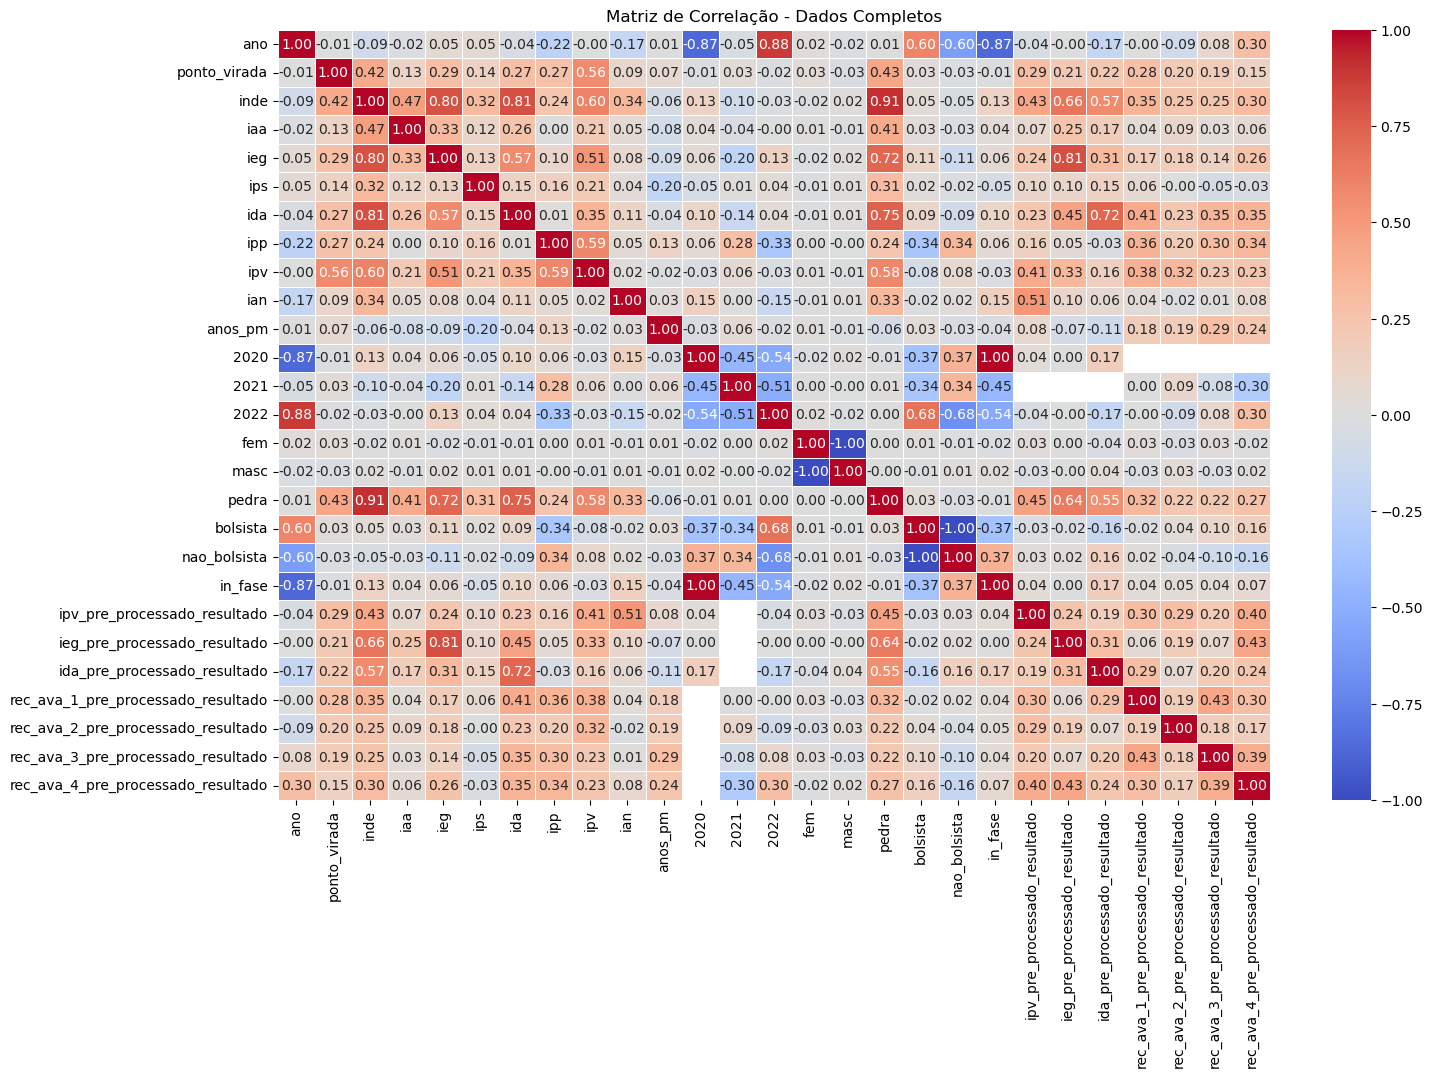

rec_ava_4_pre_processado_resultado    1304
rec_ava_3_pre_processado_resultado     963
rec_ava_1_pre_processado_resultado     727
rec_ava_2_pre_processado_resultado     727
ipv_pre_processado_resultado           708
ieg_pre_processado_resultado           684
ida_pre_processado_resultado           684
ponto_virada                            26
fem                                      3
masc                                     3
dtype: int64

In [6]:
# Em seguida, vamos gerar a matriz de correlação para análise
plt.figure(figsize=(16, 10))

# all columns except 'nome'
correlation_matrix_complete = df_model_complete.drop(columns=["nome"]).corr()
sns.heatmap(
    correlation_matrix_complete, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5
)
plt.title("Matriz de Correlação - Dados Completos")
plt.show()

# Por fim, verificamos a quantidade de valores nulos por coluna
missing_values_complete = df_model_complete.isnull().sum()

# Exibir os valores nulos
missing_values_complete[missing_values_complete > 0].sort_values(ascending=False)

1. Análise e Tratamento de Dados Nulos

1.1. Verificando a Proporção de Valores Nulos

Primeiramente, vamos calcular a porcentagem de valores nulos em cada coluna para entender a gravidade e decidir a melhor estratégia de tratamento.

In [7]:
# Calculando a porcentagem de valores nulos por coluna
missing_percent = (df_model_complete.isnull().sum() / len(df_model_complete)) * 100

# Criando um DataFrame para visualização
missing_data = pd.DataFrame(
    {"Coluna": missing_percent.index, "Percentual de Nulos": missing_percent.values}
)

# Ordenando por percentual decrescente
missing_data = missing_data.sort_values(by="Percentual de Nulos", ascending=False)

# Exibindo o resultado
print(missing_data)

                                Coluna  Percentual de Nulos
27  rec_ava_4_pre_processado_resultado            57.369116
26  rec_ava_3_pre_processado_resultado            42.366916
24  rec_ava_1_pre_processado_resultado            31.984162
25  rec_ava_2_pre_processado_resultado            31.984162
21        ipv_pre_processado_resultado            31.148262
22        ieg_pre_processado_resultado            30.092389
23        ida_pre_processado_resultado            30.092389
2                         ponto_virada             1.143863
15                                 fem             0.131984
16                                masc             0.131984
1                                  ano             0.000000
0                                 nome             0.000000
11                             anos_pm             0.000000
10                                 ian             0.000000
9                                  ipv             0.000000
8                                  ipp  

In [22]:
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 2. Remover variáveis desnecessárias
df = df_model_complete.drop(columns=["nao_bolsista", "masc", "nome"])

# 3. Verificar correlação das variáveis com 'inde'
corr_matrix = df.corr()
print(corr_matrix["inde"].sort_values(ascending=False))

# 4. Analisar o VIF das variáveis com One Hot Encoding
one_hot_cols = [
    "rec_ava_4_pre_processado_resultado",
    "rec_ava_3_pre_processado_resultado",
    "rec_ava_1_pre_processado_resultado",
    "rec_ava_2_pre_processado_resultado",
    "ipv_pre_processado_resultado",
    "ieg_pre_processado_resultado",
    "ida_pre_processado_resultado",
    "ponto_virada",
    "fem",
    "bolsista",
]

# Calcular o VIF para essas variáveis
X = df[
    one_hot_cols
].dropna()  # Remover linhas com NaNs temporariamente para calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

inde                                  1.000000
pedra                                 0.913337
ida                                   0.810671
ieg                                   0.799979
ieg_pre_processado_resultado          0.656575
ipv                                   0.603819
ida_pre_processado_resultado          0.568627
iaa                                   0.473509
ipv_pre_processado_resultado          0.432492
ponto_virada                          0.419506
rec_ava_1_pre_processado_resultado    0.351962
ian                                   0.336142
ips                                   0.318641
rec_ava_4_pre_processado_resultado    0.304999
rec_ava_2_pre_processado_resultado    0.252362
rec_ava_3_pre_processado_resultado    0.248530
ipp                                   0.237575
in_fase                               0.129720
2020                                  0.128222
bolsista                              0.045280
fem                                  -0.015324
2022         

In [23]:
# 5. Decisão baseada nos resultados de correlação e VIF:
# - Remover variáveis com baixa correlação ou VIF muito alto
# - Imputar valores faltantes para variáveis relevantes

# Exemplo de Imputação:
important_cols = vif_data[vif_data["VIF"] < 10][
    "feature"
].tolist()  # Manter as variáveis com VIF aceitável
imputer = SimpleImputer(strategy="most_frequent")
df[important_cols] = imputer.fit_transform(df[important_cols])

# Verificar se ainda existem valores nulos
print(df.isnull().sum())

# Exportar o dataframe tratado, se necessário
df.to_csv("data/df_model_complete_tratado.csv", index=False)

ano                                   0
ponto_virada                          0
inde                                  0
iaa                                   0
ieg                                   0
ips                                   0
ida                                   0
ipp                                   0
ipv                                   0
ian                                   0
anos_pm                               0
2020                                  0
2021                                  0
2022                                  0
fem                                   0
pedra                                 0
bolsista                              0
in_fase                               0
ipv_pre_processado_resultado          0
ieg_pre_processado_resultado          0
ida_pre_processado_resultado          0
rec_ava_1_pre_processado_resultado    0
rec_ava_2_pre_processado_resultado    0
rec_ava_3_pre_processado_resultado    0
rec_ava_4_pre_processado_resultado    0


In [17]:
# Selecionar apenas as colunas numéricas
numeric_features = df.select_dtypes(include=[np.number]).drop(
    columns=["inde"]
)  # Remover a variável alvo

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Variável"] = numeric_features.columns
vif_data["VIF"] = [
    variance_inflation_factor(numeric_features.values, i)
    for i in range(numeric_features.shape[1])
]

# Exibir os resultados
print(vif_data.sort_values(by="VIF", ascending=False))

                              Variável         VIF
0                                  ano         inf
12                                2022         inf
10                                2020         inf
11                                2021         inf
16                             in_fase  252.460129
14                               pedra    7.221283
5                                  ida    3.798293
3                                  ieg    3.464625
7                                  ipv    3.153291
6                                  ipp    2.408958
19        ida_pre_processado_resultado    2.310727
18        ieg_pre_processado_resultado    2.183336
15                            bolsista    2.056238
17        ipv_pre_processado_resultado    1.844728
20  rec_ava_1_pre_processado_resultado    1.826106
22  rec_ava_3_pre_processado_resultado    1.699955
8                                  ian    1.684633
1                         ponto_virada    1.468693
21  rec_ava_2_pre_processado_re

c:\Users\carlo.000\scoop\apps\miniconda3\current\envs\venv_fiapdatathon\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecionar as variáveis que precisam de redução de dimensionalidade
performance_vars = ["iaa", "ieg", "ips", "ida", "ipp", "ipv", "ian"]

# Padronizar os dados
scaler = StandardScaler()
performance_scaled = scaler.fit_transform(df[performance_vars])

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)  # Escolher 2 componentes principais, por exemplo
performance_pca = pca.fit_transform(performance_scaled)

# Adicionar os componentes principais ao dataframe
df["PC1"] = performance_pca[:, 0]
df["PC2"] = performance_pca[:, 1]

# Remover as variáveis originais que foram substituídas pelos componentes principais
df = df.drop(columns=performance_vars)

# Recalcular o VIF após a aplicação do PCA
numeric_features_updated = df.select_dtypes(include=[np.number]).drop(columns=["inde"])
vif_data_updated = pd.DataFrame()
vif_data_updated["Variável"] = numeric_features_updated.columns
vif_data_updated["VIF"] = [
    variance_inflation_factor(numeric_features_updated.values, i)
    for i in range(numeric_features_updated.shape[1])
]

# Exibir os resultados atualizados
print(vif_data_updated.sort_values(by="VIF", ascending=False))

                              Variável         VIF
0                                  ano         inf
4                                 2021         inf
3                                 2020         inf
5                                 2022         inf
9                              in_fase  251.775957
7                                pedra    5.811062
17                                 PC1    4.968997
8                             bolsista    2.014835
13  rec_ava_1_pre_processado_resultado    1.788155
18                                 PC2    1.739133
11        ieg_pre_processado_resultado    1.736029
12        ida_pre_processado_resultado    1.694063
15  rec_ava_3_pre_processado_resultado    1.654232
10        ipv_pre_processado_resultado    1.533610
1                         ponto_virada    1.364599
14  rec_ava_2_pre_processado_resultado    1.348295
16  rec_ava_4_pre_processado_resultado    1.310085
2                              anos_pm    1.203396
6                              

c:\Users\carlo.000\scoop\apps\miniconda3\current\envs\venv_fiapdatathon\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supondo que performance_scaled seja o resultado da padronização das variáveis
pca = PCA()
pca.fit(performance_scaled)

# Variância explicada acumulada
explained_variance = pca.explained_variance_ratio_.cumsum()
print(explained_variance)

[0.33758415 0.51945892 0.66092376 0.79117037 0.90147256 0.96212132
 1.        ]


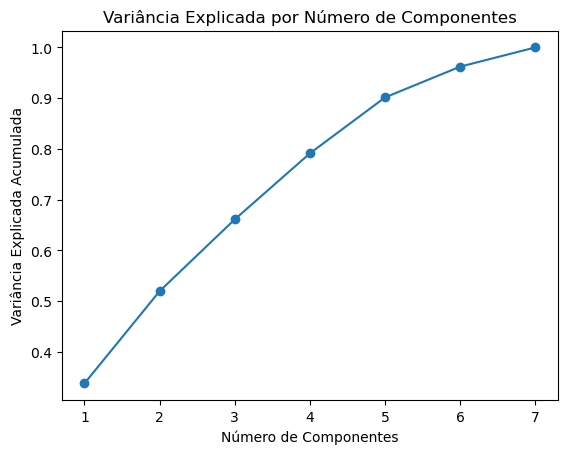

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o")
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Variância Explicada por Número de Componentes")
plt.show()

In [24]:
# Exibir a variância explicada acumulada pelos primeiros 5 componentes
explained_variance_5 = explained_variance[
    4
]  # Índice 4 corresponde ao quinto componente
explained_variance_5

np.float64(0.9014725571321391)

In [25]:
# Aplicar PCA com 5 componentes principais
pca_5 = PCA(n_components=5)
performance_pca_5 = pca_5.fit_transform(performance_scaled)

# Adicionar os componentes principais ao dataframe
for i in range(5):
    df[f"PC{i+1}"] = performance_pca_5[:, i]

# Verificar as primeiras linhas para garantir que os componentes foram adicionados corretamente
df.head()

,ano,ponto_virada,inde,iaa,ieg,ips,ida,ipp,ipv,ian,...,ida_pre_processado_resultado,rec_ava_1_pre_processado_resultado,rec_ava_2_pre_processado_resultado,rec_ava_3_pre_processado_resultado,rec_ava_4_pre_processado_resultado,PC1,PC2,PC3,PC4,PC5
0,2020,0.0,7.883752,8.50002,8.700000,7.5,7.000000,5.9375,7.750000,10.0,...,-1.0,1.0,0.0,0.0,0.0,0.725236,-0.755214,1.108150,0.312033,-0.292234
1,2021,0.0,7.319000,7.50000,6.300000,6.9,8.800000,7.7000,8.100000,5.0,...,-1.0,1.0,1.0,0.0,0.0,0.486520,0.460201,-0.651757,-0.132692,-0.674300
2,2022,0.0,7.675509,10.00002,7.581705,7.5,8.816667,5.6250,7.916665,5.0,...,1.0,0.0,0.0,0.0,0.0,0.824102,-1.066668,-0.912127,0.644375,-0.082522
3,2020,0.0,7.856390,7.91667,8.900000,7.5,5.500000,8.1250,8.111113,10.0,...,-1.0,1.0,0.0,0.0,0.0,0.960900,0.651891,1.218038,0.026418,-0.039997
4,2021,0.0,7.021000,7.10000,6.900000,6.3,5.600000,7.3000,7.200000,10.0,...,-1.0,1.0,1.0,0.0,0.0,-0.325271,0.282889,1.302212,-0.548917,-0.139851


In [26]:
# Remover as variáveis originais usadas no PCA
df = df.drop(columns=performance_vars)

# Verificar as primeiras linhas para garantir que as variáveis foram removidas corretamente
df.head()

,ano,ponto_virada,inde,anos_pm,2020,2021,2022,fem,pedra,bolsista,...,ida_pre_processado_resultado,rec_ava_1_pre_processado_resultado,rec_ava_2_pre_processado_resultado,rec_ava_3_pre_processado_resultado,rec_ava_4_pre_processado_resultado,PC1,PC2,PC3,PC4,PC5
0,2020,0.0,7.883752,2,1.0,0.0,0.0,1.0,3,0.0,...,-1.0,1.0,0.0,0.0,0.0,0.725236,-0.755214,1.108150,0.312033,-0.292234
1,2021,0.0,7.319000,3,0.0,1.0,0.0,1.0,3,1.0,...,-1.0,1.0,1.0,0.0,0.0,0.486520,0.460201,-0.651757,-0.132692,-0.674300
2,2022,0.0,7.675509,0,0.0,0.0,1.0,1.0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,0.824102,-1.066668,-0.912127,0.644375,-0.082522
3,2020,0.0,7.856390,2,1.0,0.0,0.0,1.0,3,0.0,...,-1.0,1.0,0.0,0.0,0.0,0.960900,0.651891,1.218038,0.026418,-0.039997
4,2021,0.0,7.021000,3,0.0,1.0,0.0,1.0,3,0.0,...,-1.0,1.0,1.0,0.0,0.0,-0.325271,0.282889,1.302212,-0.548917,-0.139851


In [27]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecionar apenas as colunas numéricas para calcular o VIF
numeric_features = df.select_dtypes(include=[np.number]).drop(
    columns=["inde"]
)  # Remover a variável alvo

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Variável"] = numeric_features.columns
vif_data["VIF"] = [
    variance_inflation_factor(numeric_features.values, i)
    for i in range(numeric_features.shape[1])
]

# Exibir os resultados
vif_data.sort_values(by="VIF", ascending=False)

c:\Users\carlo.000\scoop\apps\miniconda3\current\envs\venv_fiapdatathon\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variável,VIF
0,ano,inf
3,2020,inf
5,2022,inf
4,2021,inf
9,in_fase,252.128028
7,pedra,7.086346
17,PC1,6.008525
8,bolsista,2.053536
18,PC2,1.890969
12,ida_pre_processado_resultado,1.871614


In [28]:
# Remover as variáveis indicadas
df = df.drop(columns=["pedra", "in_fase", "2020", "2021", "2022"])

# Verificar as primeiras linhas para garantir que as variáveis foram removidas corretamente
df.head()

,ano,ponto_virada,inde,anos_pm,fem,bolsista,ipv_pre_processado_resultado,ieg_pre_processado_resultado,ida_pre_processado_resultado,rec_ava_1_pre_processado_resultado,rec_ava_2_pre_processado_resultado,rec_ava_3_pre_processado_resultado,rec_ava_4_pre_processado_resultado,PC1,PC2,PC3,PC4,PC5
0,2020,0.0,7.883752,2,1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.725236,-0.755214,1.108150,0.312033,-0.292234
1,2021,0.0,7.319000,3,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,0.486520,0.460201,-0.651757,-0.132692,-0.674300
2,2022,0.0,7.675509,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.824102,-1.066668,-0.912127,0.644375,-0.082522
3,2020,0.0,7.856390,2,1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.960900,0.651891,1.218038,0.026418,-0.039997
4,2021,0.0,7.021000,3,1.0,0.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,-0.325271,0.282889,1.302212,-0.548917,-0.139851


In [30]:
from sklearn.model_selection import train_test_split

# Definir as variáveis independentes (X) e a dependente (y)
X = df.drop(columns=["inde"])  # Remover 'inde' e 'nome' do conjunto de características
y = df["inde"]

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verificar as dimensões dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (1818, 17)
Tamanho do conjunto de teste: (455, 17)


In [31]:
from sklearn.linear_model import LinearRegression

# Inicializar o modelo de Regressão Linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Calcular o R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

# Calcular o RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")

R²: 0.9782
RMSE: 0.1898


c:\Users\carlo.000\scoop\apps\miniconda3\current\envs\venv_fiapdatathon\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Inicializar o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Treinar o modelo com os dados de treino
xgb_model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred_xgb = xgb_model.predict(X_test)

# Calcular o R² e RMSE para o modelo XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

r2_xgb, rmse_xgb

c:\Users\carlo.000\scoop\apps\miniconda3\current\envs\venv_fiapdatathon\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.993567513955192, np.float64(0.10299412676599237))

In [34]:
from sklearn.model_selection import KFold, cross_val_score

# Configuração da Validação Cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação Cruzada para o Modelo de Regressão Linear
cv_scores_lr = cross_val_score(model, X, y, cv=kf, scoring="r2")
cv_rmse_lr = cross_val_score(model, X, y, cv=kf, scoring="neg_root_mean_squared_error")

# Validação Cruzada para o Modelo XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=kf, scoring="r2")
cv_rmse_xgb = cross_val_score(
    xgb_model, X, y, cv=kf, scoring="neg_root_mean_squared_error"
)

# Resultados da Validação Cruzada
cv_scores_lr.mean(), cv_rmse_lr.mean(), cv_scores_xgb.mean(), cv_rmse_xgb.mean()

(np.float64(0.9745139704557527),
 np.float64(-0.18983408705434537),
 np.float64(0.9947283599205624),
 np.float64(-0.08645374269277935))

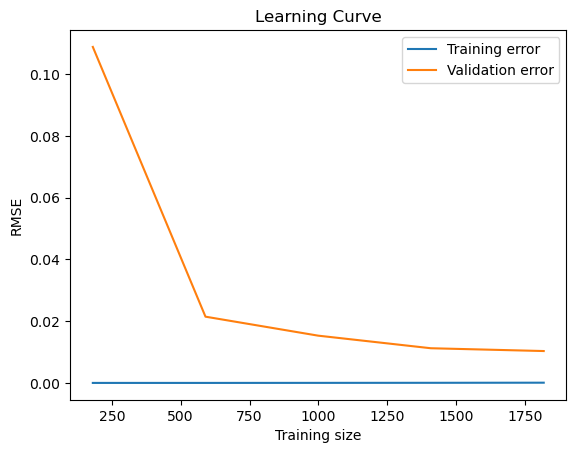

In [35]:
# 1. Curva de Aprendizado (Learning Curve)
# O que é: A curva de aprendizado mostra a relação entre o tamanho do conjunto de dados de treinamento e o desempenho do modelo em conjuntos de treino e teste.
# Como Usar: Se o desempenho no conjunto de treino é muito melhor do que no conjunto de teste à medida que o tamanho do treino aumenta, isso pode indicar overfitting.
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model,
    X,
    y,
    cv=5,
    scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 5),
    random_state=42,
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, test_scores_mean, label="Validation error")
plt.xlabel("Training size")
plt.ylabel("RMSE")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [36]:
# 2. Validação Cruzada com ShuffleSplit
# O que é: Um método de validação cruzada que repete a divisão do dataset em treino e teste várias vezes de forma aleatória, o que pode ajudar a detectar inconsistências.
# Como Usar: Se o desempenho entre as diferentes divisões varia muito, isso pode indicar que o modelo não generaliza bem e pode estar overfitting em algumas divisões.

from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
cv_results = cross_val_score(xgb_model, X, y, cv=shuffle_split, scoring="r2")
print(f"Cross-Validation R2 Mean: {cv_results.mean():.4f}")
print(f"Cross-Validation R2 Std: {cv_results.std():.4f}")

Cross-Validation R2 Mean: 0.9938
Cross-Validation R2 Std: 0.0013


In [37]:
# 3. Regularização (Ridge, Lasso, ElasticNet)
# O que é: Adiciona uma penalidade aos coeficientes do modelo para reduzir a complexidade e prevenir overfitting.
# Como Usar: Comparar o desempenho com e sem regularização pode indicar se o modelo original estava overfitting.

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R2 Ridge: {r2_ridge:.4f}")

R2 Ridge: 0.9781


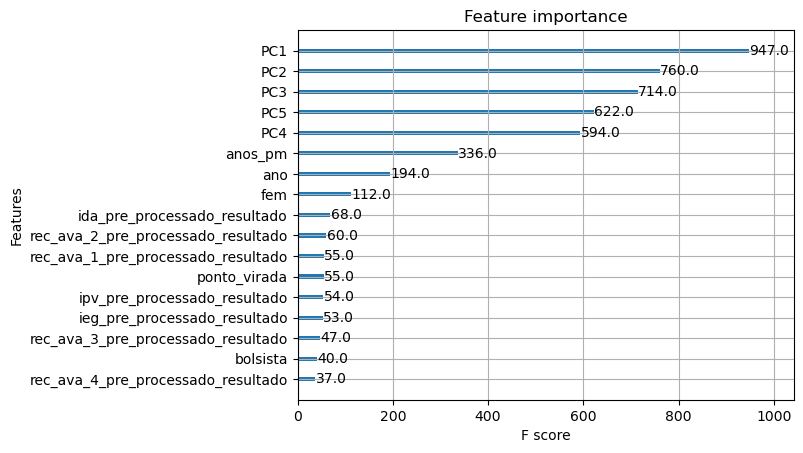

In [38]:
# 4. Feature Importance Analysis
# O que é: Verificar a importância das variáveis no modelo. Se poucas variáveis dominam a previsão, pode indicar overfitting, especialmente se essas variáveis capturam ruído em vez de sinal.
# Como Usar: Utilize os métodos de importância de características disponíveis no XGBoost para investigar.

import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model)
plt.show()

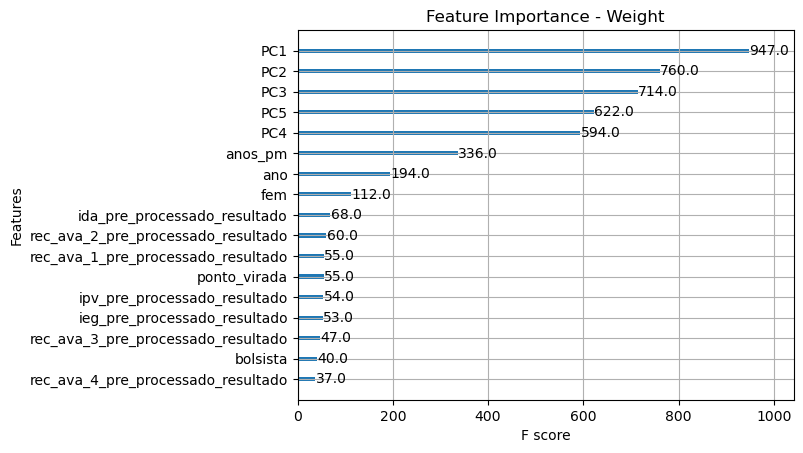

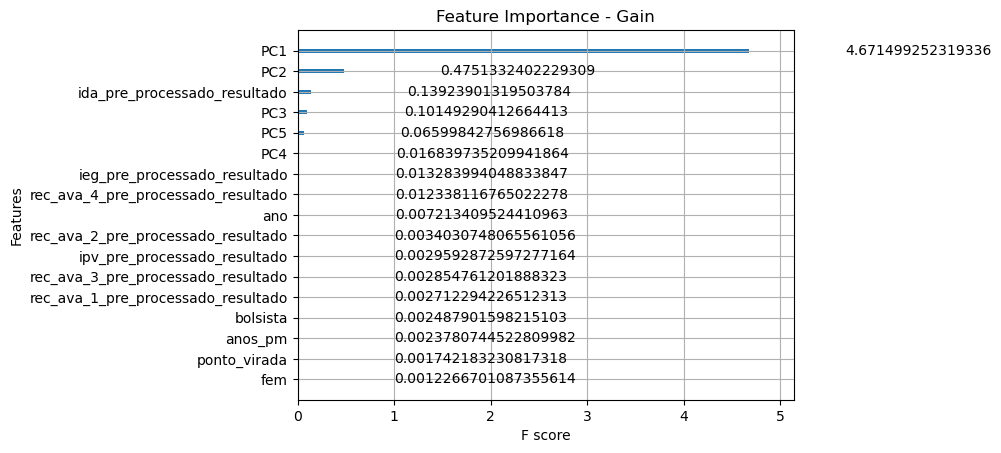

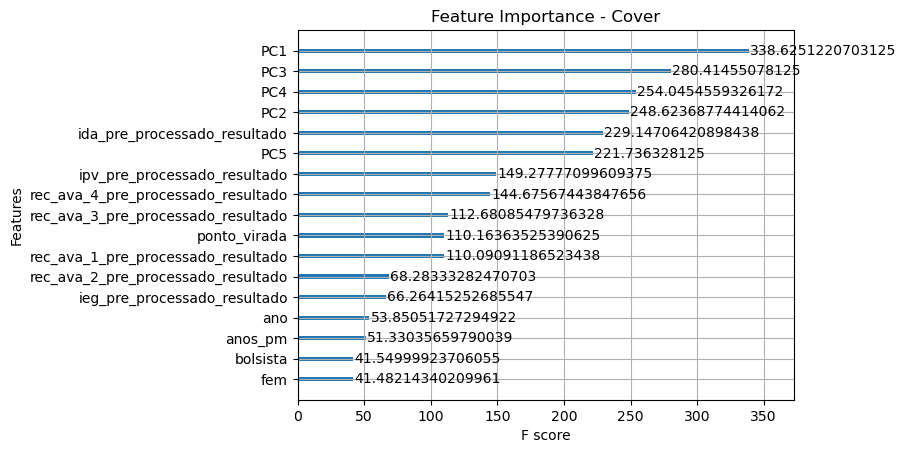

In [41]:
# Tipos de Importância das Variáveis no XGBoost:
# Weight:

# O que é: O número de vezes que uma variável é usada para dividir os dados em todas as árvores do modelo. Quanto maior o número, mais vezes essa variável foi considerada relevante para uma divisão.
# Interpretação: Se uma variável tem um peso alto, significa que ela foi frequentemente usada pelo modelo, o que sugere que é uma característica importante para a previsão.
# Gain:

# O que é: O ganho médio de importância que a variável proporcionou para as divisões nas árvores. Refere-se ao aumento na precisão das previsões ao usar essa variável em uma divisão.
# Interpretação: Se uma variável tem um ganho alto, isso indica que quando ela foi usada para dividir os dados, houve uma melhoria significativa na precisão das previsões.
# Cover:

# O que é: Mede a proporção de amostras que a variável afeta. Ou seja, quantas vezes uma variável aparece nas divisões das árvores e quanto de amostras ela cobre.
# Interpretação: Um valor de cover alto indica que a variável está afetando uma grande parte do dataset.


# Realizar a análise de importância das variáveis utilizando o modelo XGBoost
import matplotlib.pyplot as plt

# Plotar a importância das variáveis
xgb.plot_importance(xgb_model, importance_type="weight")
plt.title("Feature Importance - Weight")
plt.show()

xgb.plot_importance(xgb_model, importance_type="gain")
plt.title("Feature Importance - Gain")
plt.show()

xgb.plot_importance(xgb_model, importance_type="cover")
plt.title("Feature Importance - Cover")
plt.show()

In [39]:
# 5. Out-of-Bag (OOB) Score (para modelos de ensemble como Random Forest)
# O que é: O OOB score é uma forma de validação cruzada interna usada em Random Forests, que mede a performance em amostras não usadas durante o treinamento.
# Como Usar: Se o OOB score é significativamente pior que o score no conjunto de treino, pode indicar overfitting.
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)
print(f"OOB Score: {rf_model.oob_score_:.4f}")

OOB Score: 0.9910


In [40]:
# 6. Holdout Validation
# O que é: Reservar um conjunto de dados separado e nunca usar esses dados durante o treinamento ou ajuste de hiperparâmetros. Avaliar o modelo somente neste conjunto reservado.
# Como Usar: Se o desempenho no conjunto holdout é significativamente pior que no conjunto de treino ou validação, pode indicar overfitting.

X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42
)
xgb_model.fit(X_train_full, y_train_full)
y_pred_holdout = xgb_model.predict(X_holdout)
r2_holdout = r2_score(y_holdout, y_pred_holdout)
print(f"R2 Holdout: {r2_holdout:.4f}")

R2 Holdout: 0.9936
